In [87]:
from pylab import *
import scipy
import ruptures as rpt
%matplotlib inline

In [2]:
import mat2python
data,trial,classes=mat2python.mat2python(repetition_number=0)
#sampling rate 10 Hz

 I am loading the 0 repetition of the protocol


# Plotting the signal

Select the oxy data in the region of interest

In [3]:
oxy=data[:,0:52]
roi1=list(array([46,47,48])-1)#python indexes starts from 0
roi2=list(array([18,28,29])-1)
roi3=list(array([13, 23, 24])-1)

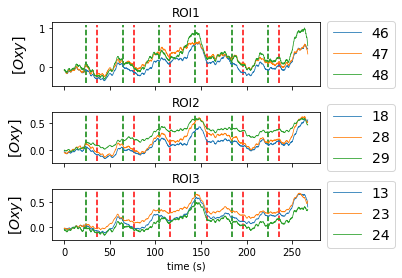

In [4]:
fig,axes=subplots(3,1,sharex=True)
t=arange(0,len(oxy))*0.1#it converts frame in time

#------------ROI1------------------
axes[0].plot(t,oxy[:,roi1],lw=0.8)
xmin,xmax,ymin,ymax=axes[0].axis()
axes[0].vlines(trial[::2]*0.1,ymin,ymax,linestyles="--",color="g")#start mental operation
axes[0].vlines(trial[1::2]*0.1,ymin,ymax,linestyles="--",color="r")#start pause
axes[0].set_title("ROI1")

# Shrink current axis by 20%
box = axes[0].get_position()
axes[0].set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
axes[0].legend(array(roi1)+1,fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
axes[0].set_ylabel("$[Oxy]$",labelpad=10,fontsize=14)

#------------ROI2------------------
axes[1].plot(t,oxy[:,roi2],lw=0.8,label="ROI2")
xmin,xmax,ymin,ymax=axes[1].axis()
axes[1].vlines(trial[::2]*0.1,ymin,ymax,linestyles="--",color="g")#start mental operation
axes[1].vlines(trial[1::2]*0.1,ymin,ymax,linestyles="--",color="r")#start pause

# Shrink current axis by 20%
box = axes[1].get_position()
axes[1].set_position([box.x0, box.y0, box.width * 0.8, box.height*0.8])

# Put a legend to the right of the current axis
axes[1].legend(array(roi2)+1,fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].set_ylabel("$[Oxy]$",fontsize=14)
axes[1].set_title("ROI2")

#------------ROI3------------------
axes[2].plot(t,oxy[:,roi3],lw=0.8,label="ROI3")
xmin,xmax,ymin,ymax=axes[2].axis()
axes[2].vlines(trial[::2]*0.1,ymin,ymax,linestyles="--",color="g")#start mental operation
axes[2].vlines(trial[1::2]*0.1,ymin,ymax,linestyles="--",color="r")#start pause

# Shrink current axis by 20%
box = axes[2].get_position()
axes[2].set_position([box.x0, box.y0, box.width * 0.8, box.height*0.8])

# Put a legend to the right of the current axis
axes[2].legend(array(roi3)+1,fontsize=14,loc='center left', bbox_to_anchor=(1, 0.5))
axes[2].set_title("ROI3")
xlabel("time (s)")
axes[2].set_ylabel("$[Oxy]$",fontsize=14)
#savefig("./figure/time-series.pdf")


# Single changepoint detection

Find when the protocol begins. We consider the time up to the first rest ( the first red line).

In [5]:
signal=oxy[:trial[1],roi1+roi2+roi3]
t_sign=arange(0,len(signal))*0.1

Change point for cusum, with mean and covariance is obtained in matlab. Values are imported here.

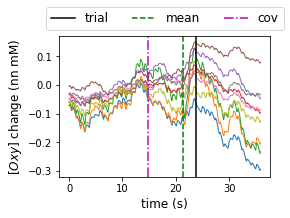

In [5]:
figure(figsize=(4,3))
signal=oxy[:trial[1],roi1+roi2+roi3]
t_sign=arange(0,len(signal))*0.1
plot(t_sign,signal,lw=1)
axvline(trial[0]*0.1,label="trial",color="k")
#axvline(l2_result[0]*0.1,color="r")
axvline(213*0.1,color="g",linestyle="--",label="mean")#cusum
axvline(148*0.1,color="m",linestyle="-.",label="cov")#cusum

xlabel("time (s)",fontsize=12)
ylabel("$[Oxy]$ change (nn mM)",fontsize=12)
tight_layout()
#legend(fontsize=12,ncol=3,numpoints=1) 
box = gca().get_position()
gca().set_position([box.x0, box.y0, box.width , box.height*0.9])
legend(fontsize=12,loc="lower center",ncol=3,numpoints=1, bbox_to_anchor=(0.5, 1))
#text(21.7,-0.3,"21.3 s",color="g")
#text(15.2,-0.3,"14.8 s",color="m")
#text(24.2,-0.3,"23.8 s",color="k")
#savefig("./figure/single_changepoint.pdf")

In [14]:
#l2 model
algo = rpt.Dynp(model="l2").fit(signal)
#algo = rpt.Dynp(model="l2").fit(oxy[:trial[1],:])
l2_result = algo.predict(n_bkps=1)
#rpt.display(signal[:,1],trial[:2],l2_result)
algo = rpt.Dynp(model="rbf").fit(signal)
rbf_result = algo.predict(n_bkps=1)
print("Changepoints: \nl2 norm    rbf \n "+str(l2_result[0])+"        "+str(rbf_result[0]))


Changepoints: 
l2 norm    rbf 
 280        280


In [46]:
trial[0]

238

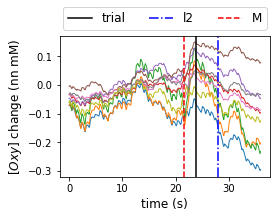

In [8]:
figure(figsize=(4,3))
signal=oxy[:trial[1],roi1+roi2+roi3]
t_sign=arange(0,len(signal))*0.1
plot(t_sign,signal,lw=1)
axvline(trial[0]*0.1,label="trial",color="k")
algo = rpt.Dynp(model="mahalanobis").fit(signal) #equivalent to rpt.Dynp(model="mahalanobis", params={"metric": inv(M)})
M_result = algo.predict(n_bkps=1)
#axvline(rbf_result[0]*0.1,color="g",linestyle="--",label="rbf")
axvline(l2_result[0]*0.1,color="b",linestyle="-.",label="l2")
#axvline(213*0.1,color="r",linestyle="--",label="mean")#cusum
axvline(M_result[0]*0.1,color="r",linestyle="--",label="M")

xlabel("time (s)",fontsize=12)
ylabel("$[Oxy]$ change (nn mM)",fontsize=12)
tight_layout()

box = gca().get_position()
gca().set_position([box.x0, box.y0, box.width , box.height*0.9])
legend(fontsize=12,loc="lower center",ncol=3,numpoints=1, bbox_to_anchor=(0.5, 1))
#savefig("./figure/cost function.pdf")

In [124]:
print(trial*0.1)
print(diff(trial)*.1)

[  23.8   36.    63.9   76.   103.9  116.   143.9  156.   183.9  196.
  223.9  236. ]
[ 12.2  27.9  12.1  27.9  12.1  27.9  12.1  27.9  12.1  27.9  12.1]


In [57]:
#M=cov(signal,rowvar=False)
algo = rpt.Dynp(model="mahalanobis").fit(signal) #equivalent to rpt.Dynp(model="mahalanobis", params={"metric": inv(M)})
M_result = algo.predict(n_bkps=1)
print(M_result[0])

215


### Autoregression

/home/k1762355/anaconda3/lib/python3.6/site-packages/ruptures/costs/costautoregressive.py:169: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  _, residual, _, _ = lstsq(X, y)


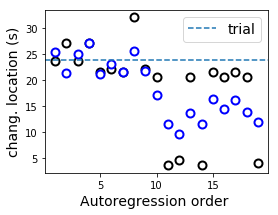

In [106]:
figure(figsize=(4,3))
dati=[]
for order in arange(1,20):
    a=[]
    for ch in arange(0,9):#explore all channel one by one
        algo = rpt.Dynp(model="ar", params={"order": order}).fit(signal[:,ch])
        result = algo.predict(n_bkps=1)
        a+=[result[0]]
    #plot(a,"o")
    #xlabel("channel")
    plot(order,median(a)*0.1,"wo",mec="k",ms=8,mew=2)
    plot(order,mean(a)*0.1,"wo",mec="b",ms=8,mew=2)
    h,b=histogram(a,bins=linspace(0,35,10))
    dati+=[a]
axhline(trial[0]*0.1,ls="--",label="trial")
legend(fontsize=14)
xlabel("Autoregression order ",fontsize=14)
ylabel("chang. location (s)",fontsize=14)
#savefig("./figure/autoregression.pdf")

In [107]:
a

[40, 40, 40, 40, 40, 220, 205, 215, 220]

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [67]:

data_array = np.array(dati)
#
# Create a figure for plotting the data as a 3D histogram.
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
# Create an X-Y mesh of the same dimension as the 2D data. You can
# think of this as the floor of the plot.
#
#x_data, y_data = np.meshgrid( np.arange(1,20),  np.arange(min(min(dati)),max(max(dati))) )
x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )
#
# Flatten out the arrays so that they may be passed to "ax.bar3d".
# Basically, ax.bar3d expects three one-dimensional arrays:
# x_data, y_data, z_data. The following call boils down to picking
# one entry from each array and plotting a bar to from
# (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).
#
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data )
#
plt.show()

In [74]:
array(dati).flatten()

array([270, 235, 235, 235, 235, 235, 235, 270, 320, 270, 320, 320,  40,
       310, 215, 310,  80,  40, 270, 215, 320, 235, 235, 220, 205, 215,
       320, 270, 320, 320, 235, 320, 220, 205, 215, 320, 135, 220, 205,
       235, 320, 220, 205, 215, 135, 135, 220, 205, 235, 320, 220, 205,
       215, 320, 135, 135, 210, 235, 320, 220, 320, 215, 135, 330,  25,
       330, 325, 320, 220, 205, 215, 325, 305, 305, 210,  25, 235, 220,
       205, 215, 220,  30, 190, 205,  30, 210, 220, 205, 215, 220,  30,
        30,  35,  30, 215, 220, 225, 215,  30,  30,  45,  45,  35,  35,
       215, 205, 215,  30,  30,  35,  35,  35, 225, 215, 205, 215, 220,
        35,  35,  35,  35, 225, 215, 205, 215,  35,  45,  50,  45, 245,
       225, 215, 205, 215, 220,  45,  50,  45, 245, 225, 215, 205, 215,
        45,  45,  45,  45, 220, 225, 220, 205, 215, 220,  40,  40,  40,
        40, 225, 220, 205, 215, 220,  40,  40,  40,  40,  40, 220, 205,
       215, 220])

In [76]:
tile(arange(1,20),9)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 18, 19,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
       12, 13, 14, 15, 16, 17, 18, 19,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  1,  2,  3,  4,  5,
        6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  1,  2,  3,
        4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])

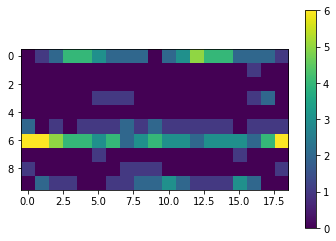

In [110]:
H,x_edges,y_edges=histogram2d(tile(arange(1,20),9),array(dati).flatten(),bins=[19,10])
shape(H)
imshow(H.T)
colorbar()

In [111]:
H

array([[0., 0., 0., 0., 0., 2., 6., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 6., 0., 0., 2.],
       [2., 0., 0., 0., 0., 1., 5., 0., 0., 1.],
       [4., 0., 0., 0., 0., 0., 4., 0., 0., 1.],
       [4., 0., 0., 0., 0., 1., 4., 0., 0., 0.],
       [3., 0., 0., 1., 0., 1., 3., 1., 0., 0.],
       [2., 0., 0., 1., 0., 1., 4., 0., 0., 1.],
       [2., 0., 0., 1., 0., 2., 2., 0., 1., 1.],
       [2., 0., 0., 0., 0., 1., 3., 0., 1., 2.],
       [0., 0., 0., 0., 0., 2., 4., 0., 1., 2.],
       [2., 0., 0., 0., 0., 1., 3., 0., 0., 3.],
       [3., 0., 0., 0., 0., 1., 3., 0., 0., 2.],
       [5., 0., 0., 0., 0., 1., 2., 0., 0., 1.],
       [4., 0., 0., 0., 0., 1., 3., 0., 0., 1.],
       [4., 0., 0., 0., 0., 1., 3., 0., 0., 1.],
       [2., 0., 0., 0., 0., 0., 3., 1., 0., 3.],
       [2., 1., 0., 1., 0., 1., 2., 0., 0., 2.],
       [2., 0., 0., 2., 0., 1., 4., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 6., 0., 1., 0.]])

In [101]:
H

array([[0., 6., 3.],
       [1., 4., 4.],
       [2., 4., 3.],
       [4., 2., 3.],
       [4., 4., 1.],
       [3., 4., 2.],
       [2., 5., 2.],
       [2., 5., 2.],
       [2., 4., 3.],
       [0., 6., 3.],
       [2., 3., 4.],
       [3., 3., 3.],
       [5., 3., 1.],
       [4., 4., 1.],
       [4., 4., 1.],
       [2., 3., 4.],
       [3., 4., 2.],
       [2., 7., 0.],
       [1., 7., 1.]])

In [75]:
from numpy.lib.stride_tricks import as_strided
from numpy.linalg import lstsq
from ruptures.base import BaseCost

class MyCost(BaseCost):

    """Custom cost for multivariate  autoregression."""

    # The 2 following attributes must be specified for compatibility.
    model = "multivariateAR"

    def __init__(self, order=4):
        self.signal = None
        self.covar = None
        self.min_size = max(5, order + 1)
        self.order = order

    def fit(self, signal):
        """Set parameters of the instance.
        Args:
            signal (array): signal. Shape (n_samples,) or (n_samples, n_features)
        Returns:
            self
        """
        if signal.ndim == 1:
            self.signal = signal.reshape(-1, 1)
        else:
            self.signal = signal
        # Mahalanobis metric if self.metric is None
        if self.metric is None:
            covar = np.cov(signal.T)
            self.metric = inv(covar.reshape(1, 1) if covar.size == 1 else covar)
 
        # lagged covariates
        n_samples, n_features = self.signal.shape
        strides = (self.signal.itemsize, self.signal.itemsize)
        shape = (n_samples - self.order, self.order)
        lagged = as_strided(self.signal, shape=shape, strides=strides)
        # pad the first columns
        lagged_after_padding = np.pad(lagged,
                                      ((self.order, 0), (0, 0)),
                                      mode="edge")
        # add intercept
        self.covar = np.c_[lagged_after_padding, np.ones(n_samples)]
        # pad signal on the edges
        self.signal[:self.order] = self.signal[self.order]
        return self

    def error(self, start, end):
        """Return the approximation cost on the segment [start:end].
        Args:
            start (int): start of the segment
            end (int): end of the segment
        Returns:
            float: segment cost
        Raises:
            NotEnoughPoints: when the segment is too short (less than ``'min_size'`` samples).
        """
        if end - start < self.min_size:
            raise NotEnoughPoints
        y, X = self.signal[start:end], self.covar[start:end]
        _, residual, _, _ = lstsq(X, y)
        return residual.sum()

In [233]:
x=arange(10)
A=as_strided(x,shape=(10-2,2),strides=(x.itemsize,x.itemsize))
print(A)
np.pad(A,((2, 0), (0, 0)), mode="edge")

[[0 1]
 [1 2]
 [2 3]
 [3 4]
 [4 5]
 [5 6]
 [6 7]
 [7 8]]


array([[0, 1],
       [0, 1],
       [0, 1],
       [1, 2],
       [2, 3],
       [3, 4],
       [4, 5],
       [5, 6],
       [6, 7],
       [7, 8]])

In [174]:
x=arange(12).reshape(4,3)
print(x)
A=as_strided(x,shape=(2,3,3-1),strides=(x.itemsize,x.itemsize,x.itemsize))


[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [232]:
x=arange(12).reshape(4,3)
A=squeeze(rolling_window(x,(2,3)))[:-1,:,:]
print(A)
np.pad(A,((2, 0), (0, 0),(0, 0)),                               mode="edge")


[[[0 1 2]
  [3 4 5]]

 [[3 4 5]
  [6 7 8]]]


array([[[0, 1, 2],
        [3, 4, 5]],

       [[0, 1, 2],
        [3, 4, 5]],

       [[0, 1, 2],
        [3, 4, 5]],

       [[3, 4, 5],
        [6, 7, 8]]])

In [217]:
x=arange(12).reshape(4,3)
shape(squeeze(rolling_window(x,(2,3)))[:-1,::])

(2, 2, 3)

In [69]:
roi1+roi2+roi3 -1

TypeError: unsupported operand type(s) for -: 'list' and 'int'

In [67]:
shape(oxy[:,51])

(2671,)

In [159]:
def rolling_window(array, window=(0,), asteps=None, wsteps=None, axes=None, toend=True):
    """Create a view of `array` which for every point gives the n-dimensional
    neighbourhood of size window. New dimensions are added at the end of
    `array` or after the corresponding original dimension.
    
    Parameters
    ----------
    array : array_like
        Array to which the rolling window is applied.
    window : int or tuple
        Either a single integer to create a window of only the last axis or a
        tuple to create it for the last len(window) axes. 0 can be used as a
        to ignore a dimension in the window.
    asteps : tuple
        Aligned at the last axis, new steps for the original array, ie. for
        creation of non-overlapping windows. (Equivalent to slicing result)
    wsteps : int or tuple (same size as window)
        steps for the added window dimensions. These can be 0 to repeat values
        along the axis.
    axes: int or tuple
        If given, must have the same size as window. In this case window is
        interpreted as the size in the dimension given by axes. IE. a window
        of (2, 1) is equivalent to window=2 and axis=-2.       
    toend : bool
        If False, the new dimensions are right after the corresponding original
        dimension, instead of at the end of the array. Adding the new axes at the
        end makes it easier to get the neighborhood, however toend=False will give
        a more intuitive result if you view the whole array.
    
    Returns
    -------
    A view on `array` which is smaller to fit the windows and has windows added
    dimensions (0s not counting), ie. every point of `array` is an array of size
    window.
    
    Examples
    --------
    >>> a = np.arange(9).reshape(3,3)
    >>> rolling_window(a, (2,2))
    array([[[[0, 1],
             [3, 4]],

            [[1, 2],
             [4, 5]]],


           [[[3, 4],
             [6, 7]],

            [[4, 5],
             [7, 8]]]])
    
    Or to create non-overlapping windows, but only along the first dimension:
    >>> rolling_window(a, (2,0), asteps=(2,1))
    array([[[0, 3],
            [1, 4],
            [2, 5]]])
    
    Note that the 0 is discared, so that the output dimension is 3:
    >>> rolling_window(a, (2,0), asteps=(2,1)).shape
    (1, 3, 2)
    
    This is useful for example to calculate the maximum in all (overlapping)
    2x2 submatrixes:
    >>> rolling_window(a, (2,2)).max((2,3))
    array([[4, 5],
           [7, 8]])
           
    Or delay embedding (3D embedding with delay 2):
    >>> x = np.arange(10)
    >>> rolling_window(x, 3, wsteps=2)
    array([[0, 2, 4],
           [1, 3, 5],
           [2, 4, 6],
           [3, 5, 7],
           [4, 6, 8],
           [5, 7, 9]])
    """
    array = np.asarray(array)
    orig_shape = np.asarray(array.shape)
    window = np.atleast_1d(window).astype(int) # maybe crude to cast to int...
    
    if axes is not None:
        axes = np.atleast_1d(axes)
        w = np.zeros(array.ndim, dtype=int)
        for axis, size in zip(axes, window):
            w[axis] = size
        window = w
    
    # Check if window is legal:
    if window.ndim > 1:
        raise ValueError("`window` must be one-dimensional.")
    if np.any(window < 0):
        raise ValueError("All elements of `window` must be larger then 1.")
    if len(array.shape) < len(window):
        raise ValueError("`window` length must be less or equal `array` dimension.") 

    _asteps = np.ones_like(orig_shape)
    if asteps is not None:
        asteps = np.atleast_1d(asteps)
        if asteps.ndim != 1:
            raise ValueError("`asteps` must be either a scalar or one dimensional.")
        if len(asteps) > array.ndim:
            raise ValueError("`asteps` cannot be longer then the `array` dimension.")
        # does not enforce alignment, so that steps can be same as window too.
        _asteps[-len(asteps):] = asteps
        
        if np.any(asteps < 1):
             raise ValueError("All elements of `asteps` must be larger then 1.")
    asteps = _asteps
    
    _wsteps = np.ones_like(window)
    if wsteps is not None:
        wsteps = np.atleast_1d(wsteps)
        if wsteps.shape != window.shape:
            raise ValueError("`wsteps` must have the same shape as `window`.")
        if np.any(wsteps < 0):
             raise ValueError("All elements of `wsteps` must be larger then 0.")

        _wsteps[:] = wsteps
        _wsteps[window == 0] = 1 # make sure that steps are 1 for non-existing dims.
    wsteps = _wsteps

    # Check that the window would not be larger then the original:
    if np.any(orig_shape[-len(window):] < window * wsteps):
        raise ValueError("`window` * `wsteps` larger then `array` in at least one dimension.")

    new_shape = orig_shape # just renaming...
    
    # For calculating the new shape 0s must act like 1s:
    _window = window.copy()
    _window[_window==0] = 1
    
    new_shape[-len(window):] += wsteps - _window * wsteps
    new_shape = (new_shape + asteps - 1) // asteps
    # make sure the new_shape is at least 1 in any "old" dimension (ie. steps
    # is (too) large, but we do not care.
    new_shape[new_shape < 1] = 1
    shape = new_shape
    
    strides = np.asarray(array.strides)
    strides *= asteps
    new_strides = array.strides[-len(window):] * wsteps
    
    # The full new shape and strides:
    if toend:
        new_shape = np.concatenate((shape, window))
        new_strides = np.concatenate((strides, new_strides))
    else:
        _ = np.zeros_like(shape)
        _[-len(window):] = window
        _window = _.copy()
        _[-len(window):] = new_strides
        _new_strides = _
        
        new_shape = np.zeros(len(shape)*2, dtype=int)
        new_strides = np.zeros(len(shape)*2, dtype=int)
        
        new_shape[::2] = shape
        new_strides[::2] = strides
        new_shape[1::2] = _window
        new_strides[1::2] = _new_strides
    
    new_strides = new_strides[new_shape != 0]
    new_shape = new_shape[new_shape != 0]
    
    return np.lib.stride_tricks.as_strided(array, shape=new_shape, strides=new_strides)